<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/29-cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

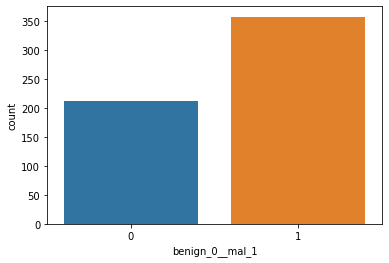

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

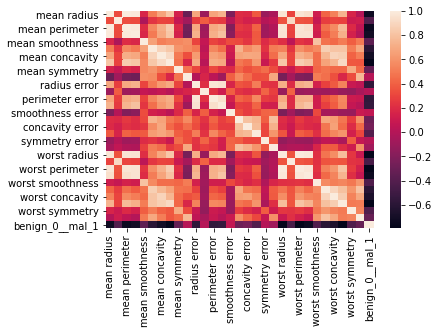

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

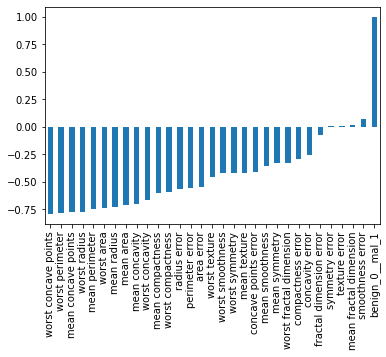

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

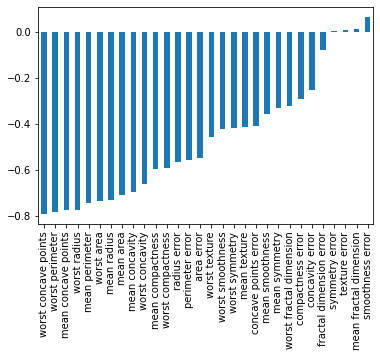

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 2s 97ms/step - loss: 0.6872 - val_loss: 0.6508
Epoch 2/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6397 - val_loss: 0.6181
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6000 - val_loss: 0.5808
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5617 - val_loss: 0.5367
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5124 - val_loss: 0.4914
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4674 - val_loss: 0.4440
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4259 - val_loss: 0.3984
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3769 - val_loss: 0.3562
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3454 - val_loss: 0.3253
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3102 - val_loss: 0.2887
Epoch 

14/14 [==============================] - 0s 17ms/step - loss: 0.0429 - val_loss: 0.1282
Epoch 83/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0504 - val_loss: 0.1267
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0568 - val_loss: 0.1268
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0555 - val_loss: 0.1238
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0570 - val_loss: 0.1245
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0637 - val_loss: 0.1266
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.1279
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.1266
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0471 - val_loss: 0.1313
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0478 - val_loss: 0.1294
Epoch 92/60

14/14 [==============================] - 0s 10ms/step - loss: 0.0497 - val_loss: 0.1460
Epoch 164/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0385 - val_loss: 0.1388
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0390 - val_loss: 0.1480
Epoch 166/600
14/14 [==============================] - 1s 46ms/step - loss: 0.0424 - val_loss: 0.1403
Epoch 167/600
14/14 [==============================] - 1s 55ms/step - loss: 0.0450 - val_loss: 0.1490
Epoch 168/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0425 - val_loss: 0.1398
Epoch 169/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0424 - val_loss: 0.1534
Epoch 170/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0427 - val_loss: 0.1423
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0633 - val_loss: 0.1443
Epoch 172/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0440 - val_loss: 0.1

14/14 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.1564
Epoch 244/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0322 - val_loss: 0.1479
Epoch 245/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 0.1744
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0405 - val_loss: 0.1512
Epoch 247/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0324 - val_loss: 0.1659
Epoch 248/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0476 - val_loss: 0.1613
Epoch 249/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0471 - val_loss: 0.1593
Epoch 250/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0436 - val_loss: 0.1573
Epoch 251/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0344 - val_loss: 0.1678
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0382 - val_loss: 0.1707

14/14 [==============================] - 0s 9ms/step - loss: 0.0296 - val_loss: 0.1805
Epoch 324/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0359 - val_loss: 0.1691
Epoch 325/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0320 - val_loss: 0.1826
Epoch 326/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0249 - val_loss: 0.1752
Epoch 327/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0319 - val_loss: 0.1718
Epoch 328/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0350 - val_loss: 0.1792
Epoch 329/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0289 - val_loss: 0.1673
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.1883
Epoch 331/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0408 - val_loss: 0.1665
Epoch 332/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0479 - val_loss: 0.189

14/14 [==============================] - 0s 10ms/step - loss: 0.0268 - val_loss: 0.2025
Epoch 404/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0334 - val_loss: 0.1978
Epoch 405/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0324 - val_loss: 0.1862
Epoch 406/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0329 - val_loss: 0.1905
Epoch 407/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 0.1927
Epoch 408/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.1799
Epoch 409/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0215 - val_loss: 0.2064
Epoch 410/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0249 - val_loss: 0.1781
Epoch 411/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0267 - val_loss: 0.2046
Epoch 412/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0265 - val_loss: 0.1

14/14 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.2202
Epoch 484/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0229 - val_loss: 0.2032
Epoch 485/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0280 - val_loss: 0.2165
Epoch 486/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.2109
Epoch 487/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.2003
Epoch 488/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0256 - val_loss: 0.2263
Epoch 489/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0298 - val_loss: 0.2175
Epoch 490/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.2134
Epoch 491/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0244 - val_loss: 0.2123
Epoch 492/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0322 - val_loss: 0.2

14/14 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.2355
Epoch 564/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.2564
Epoch 565/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.2293
Epoch 566/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.2322
Epoch 567/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.2273
Epoch 568/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.2322
Epoch 569/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0297 - val_loss: 0.2303
Epoch 570/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0314 - val_loss: 0.2346
Epoch 571/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.2183
Epoch 572/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0237 - val_loss: 0.2529


In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

<AxesSubplot:>

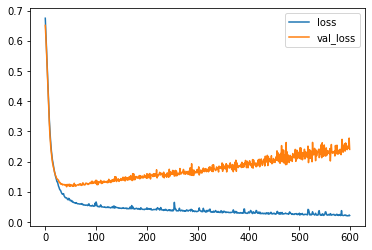

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 32ms/step - loss: 0.6737 - val_loss: 0.6542
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6423 - val_loss: 0.6251
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6099 - val_loss: 0.5839
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5669 - val_loss: 0.5360
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5154 - val_loss: 0.4821
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4600 - val_loss: 0.4276
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4060 - val_loss: 0.3759
Epoch 8/600
14/14 [==============================] - 0s 22ms/step - loss: 0.3675 - val_loss: 0.3273
Epoch 9/600
14/14 [==============================] - 0s 16ms/step - loss: 0.3152 - val_loss: 0.2886
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2801 - val_loss: 0.2595
Epoc

<AxesSubplot:>

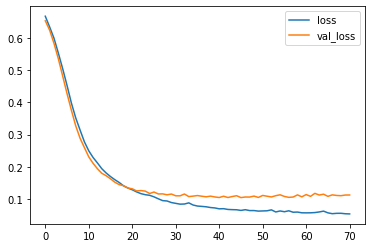

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.7209 - val_loss: 0.6839
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6750 - val_loss: 0.6714
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6837 - val_loss: 0.6565
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6596 - val_loss: 0.6396
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6484 - val_loss: 0.6233
Epoch 6/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6301 - val_loss: 0.5991
Epoch 7/600
14/14 [==============================] - 0s 20ms/step - loss: 0.6083 - val_loss: 0.5744
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5598 - val_loss: 0.5419
Epoch 9/600
14/14 [==============================] - 0s 21ms/step - loss: 0.5515 - val_loss: 0.5122
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5468 - val_loss: 0.4819
Ep

14/14 [==============================] - 0s 15ms/step - loss: 0.1183 - val_loss: 0.0961
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1392 - val_loss: 0.0883
Epoch 84/600
14/14 [==============================] - 0s 14ms/step - loss: 0.1239 - val_loss: 0.0777
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1417 - val_loss: 0.0861
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1440 - val_loss: 0.0874
Epoch 87/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1220 - val_loss: 0.0952
Epoch 88/600
14/14 [==============================] - 0s 15ms/step - loss: 0.1001 - val_loss: 0.0771
Epoch 89/600
14/14 [==============================] - 0s 17ms/step - loss: 0.1070 - val_loss: 0.0762
Epoch 90/600
14/14 [==============================] - 0s 17ms/step - loss: 0.1250 - val_loss: 0.0889
Epoch 91/600
14/14 [==============================] - 1s 49ms/step - loss: 0.1216 - val_loss: 0.1031
Epoch 9

<AxesSubplot:>

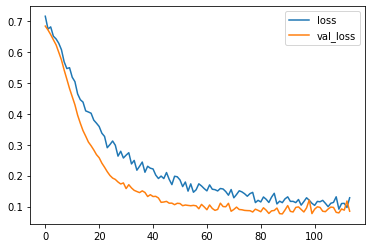

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

/home/alysson/Desktop/DS-ML-Bootcamp/env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
